# Zadanie 6.1
Określmy
$$a_n = (1+\frac{1}{n})^n$$
dla $n \in \mathbb{N}\setminus \{0\}$. Zgodnie z definicją, $e := lim_{n \rightarrow \infty} a_n$.
Dla danego $n$, możemy traktować $a_n$ jako pewne przybliżenie $e$. Niech $r_n := |a_n − e|$ oznacza
błąd bezwzględny takiego przybliżenia. Zbadaj, jak szybko $a_n → e$, rysując wykres $r_n$ od $n$. Na
wykresie zaznacz gwiazdkami innego koloru niż ten wykres punkty, gdzie błąd po raz pierwszy
staje się mniejszy niż 0.1, 0.01, 0.001, 0.0001 oraz 0.00001.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
space = np.arange(1, 1_000_000)
a_n = lambda n: (1+1/n)**n
r_n = lambda f, n: abs(f(n)-np.e)
r = r_n(a_n, space)

In [14]:
points = [np.where(r < i)[0][0] for i in [0.1, 0.01, 0.001, 0.0001, 0.00001]]
points

[12, 134, 1358, 13590, 135912]

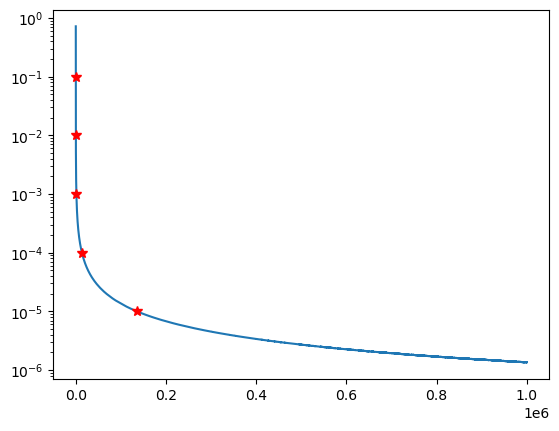

In [15]:
plt.plot(space, r, marker="*", markevery=points, markeredgecolor="red", markerfacecolor="red", markersize=7)
plt.yscale("log")
plt.show()

# Zadanie 6.2
Określmy
$$b_n = (1+\frac{1}{n})^{n+1}$$
dla $n \in \mathbb{N}\setminus \{0\}$. Dla ciągu $b_n$ zachodzi $lim_{n \rightarrow \infty} b_n = e$ tak jak dla ciągu $a_n$ z zadania 6.1.
Analogicznie dla danego $n$ możemy traktować $b_n$ jako pewne przybliżenie $e$ i wyznaczyć błąd
bezwzględny tego przybliżenia.
Określ, wykonując odpowiedni rysunek, czy któryś z tych dwóch ciągów dąży istotnie szyb-
ciej do wartości $e$.

In [16]:
space = np.arange(1, 200_000)
b_n = lambda n: (1+1/n)**(n+1)
r_a = r_n(a_n, space)
r_b = r_n(b_n, space)

In [17]:
points_a = [np.where(r_a < i)[0][0] for i in [0.1, 0.01, 0.001, 0.0001, 0.00001]]
points_b = [np.where(r_b < i)[0][0] for i in [0.1, 0.01, 0.001, 0.0001, 0.00001]]

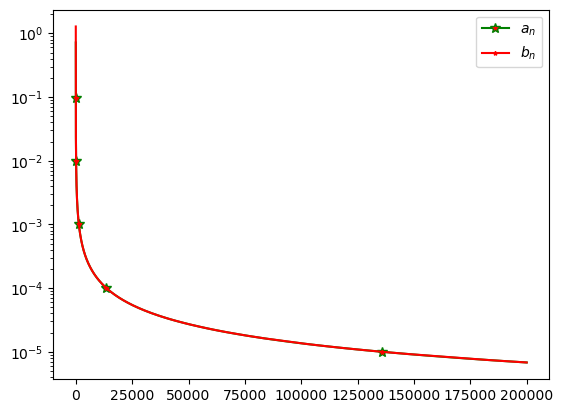

In [18]:
plt.plot(space, r_a, c="green", label="$a_n$", marker="*", markevery=points_a, markeredgecolor="green", markerfacecolor="red", markersize=7)
plt.plot(space, r_b, c="red", label="$b_n$", marker="*", markevery=points_b, markeredgecolor="red", markerfacecolor="red", markersize=3)
plt.legend()
# plt.xscale("log")
plt.yscale("log")
plt.show()

# Zadanie 6.3
Ciąg Fibonacciego określamy zależnością:
$$ f_n := \begin{cases}
0 & dla n=0, \\
1 & dla n=1, \\
f_{n-1} + f_{n-2} dla n \geq 2
\end{cases}$$
- Zdefiniuj macierz $A$, taką że zachodzi
$$\begin{bmatrix}
f_n \\ f_{n+1} \end{bmatrix}
= A\begin{bmatrix}
f_{n-1} \\ f_n \end{bmatrix}$$


$$A = \begin{bmatrix}
0 & 1 \\
1 & 1 \end{bmatrix}$$

In [19]:
A = np.array([[0, 1], [1, 1]])
A@np.array([3, 5])

array([5, 8])

- Wykonaj procedurę, która oblicza dany $n$ wyraz ciągu Fibonacciego wykorzystując macierz $A$ i zwraca go.
- Upewnij się, że procedura zwraca poprawne wyniki.

In [20]:
def fibonaci_macierz(n):
    if n < 2:
        return n
    A = np.array([[0, 1], [1, 1]])
    fib = np.array([0, 1])
    for _ in range(n-1):
        fib = A@fib
    return fib[1]

In [21]:
def fibonaci_iteracyjnie(n):
    if n <=1:
        return n
    else:
        return fibonaci_iteracyjnie(n-1)+fibonaci_iteracyjnie(n-2)

In [22]:
for i in range(35):
    print(i, fibonaci_macierz(i), fibonaci_iteracyjnie(i))

0 0 0
1 1 1
2 1 1
3 2 2
4 3 3
5 5 5
6 8 8
7 13 13
8 21 21
9 34 34
10 55 55
11 89 89
12 144 144
13 233 233
14 377 377
15 610 610
16 987 987
17 1597 1597
18 2584 2584
19 4181 4181
20 6765 6765
21 10946 10946
22 17711 17711
23 28657 28657
24 46368 46368
25 75025 75025
26 121393 121393
27 196418 196418
28 317811 317811
29 514229 514229
30 832040 832040
31 1346269 1346269
32 2178309 2178309
33 3524578 3524578
34 5702887 5702887


# Zadanie 6.4. 
Czy istnieje ciąg liczb rzeczywistych $[d0, d1, . . . , d6]$, taki że wszystkie następujące
wyrażenia przyjmują jednocześnie wartość 3:
- $d_0+2d_1$,
- $d_0+d_1$,
- $d_1+d_2+d_3$,
- $d_2+d_3+d_4$,
- $d_3+d_4+d_5$,
- $d_5+4d_6$,
- suma wszystkich elementów tego ciągu

$$A \cdot d=\begin{bmatrix} 3 \\ 3 \\ 3 \\ 3 \\ 3 \\ 3 \\ 3\\ \end{bmatrix}$$
$$A = \begin{bmatrix} 
1 & 2 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 4 \\
1 & 1 & 1 & 1 & 1 & 1 \end{bmatrix}

In [24]:
A = np.array([[1, 2, 0, 0, 0, 0],
              [1, 1, 0, 0, 0, 0],
              [1, 1, 1, 0, 0, 0],
              [0, 1, 1, 1, 0, 0],
              [0, 0, 1, 1, 1, 0],
              [0, 0, 0, 0, 1, 4],
              [1, 1, 1, 1, 1, 1]])

In [ ]:
y = np.